# Basic Image Processing

In this exercise, we will review the basic concepts in linear imaging systems. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi

First, load a test image (cameraman.tif) to play with. We will use this image as an input to our imaging systems. 

(256, 256)


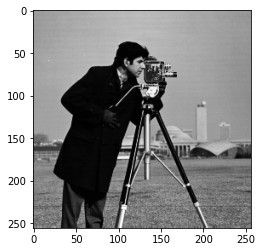

In [ ]:
import imageio

# testimg = imageio.imread('/content/cameraman.tif')
testimg = imageio.imread(imageio.core.urlopen('https://people.math.sc.edu/Burkardt/data/tif/cameraman.tif').read(), '.tif')
plt.imshow(testimg, cmap='gray')

print(testimg.shape)

# Point spread function
The output image of a linear shift-invariant image system is the result of the convolution between the input and the impulse response, or the point spread function.

$$ g(x,y)=h(x,y)∗h(x,y) $$

Now, let's define a sample 2D PSF. For example, let's imagine a linear shift-invariant imaging system whose PSF is a 2D gaussian. 2D Gaussian is defined as

$$ h(x,y)=\frac{1}{2\pi\sigma^2}e^{−(x^2+y^2)/2\sigma^2} $$

It should look something like this;


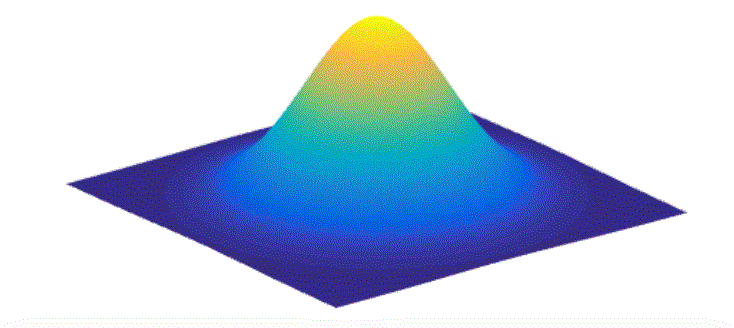


##Q1 
Implement a 2D gaussian PSF whose full width at half maximum (FWHM) is 6 pixels. Note that in a gaussian, FWHM $\simeq 2 \sigma \sqrt{2\ln2}$.

In [ ]:
# setting up for image size and coordinate
N = 31 # it is usually better to use odd number of pixels for a convolution kernel. Think about why.
psf = np.zeros([N,N])
x = np.linspace(-(N//2), N//2, N)
y = np.linspace(-(N//2), N//2, N)
xcoord, ycoord = np.meshgrid(x,y)
print(x)
# now define a gaussian PSF here


[-15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.
  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.]


## Q2

In the previous exercise (colab1), we implemented 1d convolution using FFT. Here, we will implement fast 2D convolution using 2d FFTs. Use fft2, ifft2, fftshifts/ifftshifts wisely to implement fast 2D convolution (See https://numpy.org/doc/stable/reference/routines.fft.html for details). 
Check your results by convolving the cameraman with the gaussian PSF. 

Hint : You can use [np.pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html) to match the sizes of the psf and the image. 

In [ ]:
def fftconv2d(image, psf):
    # Your code here
    

SyntaxError: ignored

## Q3

scipy signal processing library has built-in 2D convolution.(https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) Compare your results with the built-in 2d conv. How well is your fftconv doing?



(286, 286)


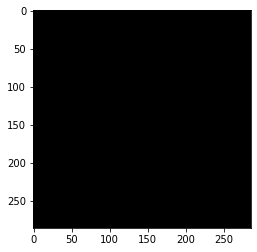

In [ ]:
from scipy import signal

blurred_builtin = signal.convolve2d(testimg,psf)
plt.imshow(blurred_builtin,  cmap='gray')
print(blurred_builtin.shape)

# compare your results


# 2D Fourier transform of an image

Taking the Fourier transform of an image gives spatial frequency information of the image. For an image $f(x, y)$,
$$ F(k_x, k_y) = \mathcal {F} [f(x, y)]$$

The magnitude and the phase of $F(k_x, k_y)$ represent the strength and the phase of the spatial frequency component. $k_x$ and $k_y$ are spatial frequencies. We can compute 2D Fourier transform of an image using built-in 2D fft modules. 



## Example 1
For example, we can create an image of sinusoidal stripes with  fixed spatial frequencies. To evaluate spatial frequency in units of cycles per mm, we will assign a physical size (0.01 mm) to a pixel.

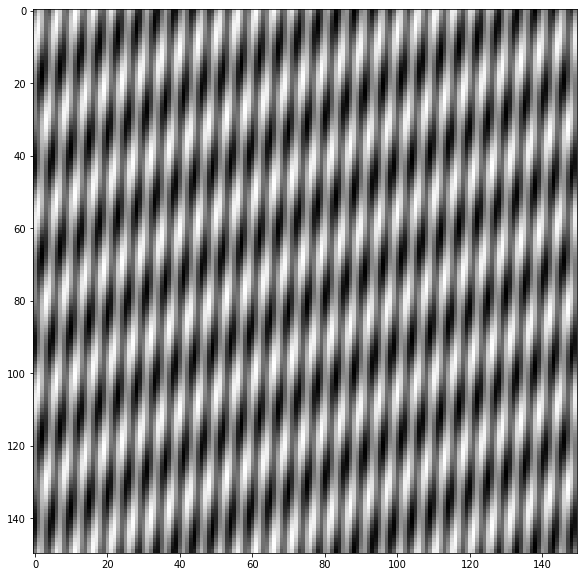

In [ ]:
N = 150
psize = 0.01  # mm per pixel
stripes = np.zeros([N,N])

x = np.linspace(0,N,N)*psize
y = np.linspace(0,N,N)*psize
xcoord, ycoord = np.meshgrid(x,y)

kx1 = 2 ## cycles per mm
ky1 = 4

kx2 = 20
ky2 = 2

stripes = 3*np.ones([N,N]) + 2*np.sin(2*PI*(kx1*xcoord+ky1*ycoord)) + 3*np.sin(2*PI*(kx2*xcoord+ky2*ycoord))

plt.figure(figsize=(10,10))
plt.imshow(stripes,cmap='gray')


We can take the Fourier transform of this image with np.fft.fft2, and use np.fft.fftshift to flip the axis and place the 0 frequency at the center of the 2D matrix.

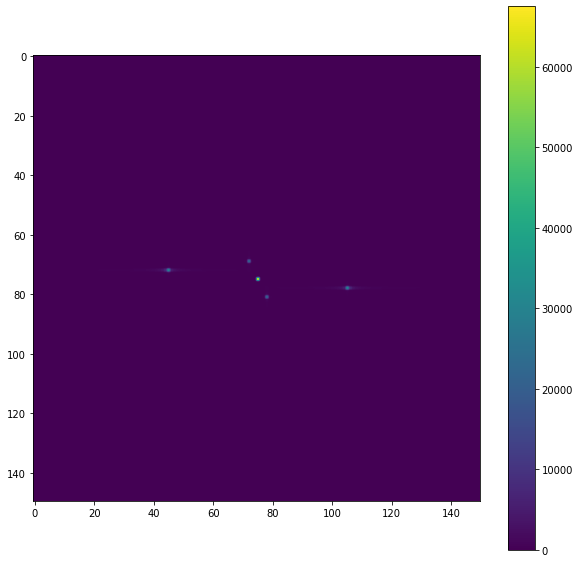

In [ ]:
stripes_F = np.fft.fft2(stripes)
spectrum = np.abs(np.fft.fftshift(stripes_F))
plt.figure(figsize=(10,10))
plt.imshow(spectrum)
plt.colorbar()
plt.show()

## Q4
What do the bright spots mean? What do the index values mean? (Hint: try adjusting the patterns in the original image and see how the result changes)



In [ ]:
# peak values and locations
idx = np.argwhere(spectrum > np.max(spectrum)*0.2) # arbitrary non-zero threshold value I chose. may need adjustment if sinusoid amplitudes in the example change
print(idx-N//2) # pixels from center. you should get 2n+1 points (1 for dc, 2 for each sinusoid)
print(spectrum[idx[:,0],idx[:,1]]) # values

[[ -6  -3]
 [ -3 -30]
 [  0   0]
 [  3  30]
 [  6   3]]
[22422.68899963 31522.3230056  67500.         31522.3230056
 22422.68899963]


### A. 
Your answer here









## Q5
Take the Fourier transform of the test image (cameraman) and plot its spectrum. The spectrum needs to be plotted in log in order to view all frequency components. 

In [ ]:
# your code here


## Q6 
Now try the FT of the test image convolved with the 2D gaussian PSF from Q2-3. How does it differ from the previous result? What does it mean?

In [ ]:
# your code here


### A.
 Your answer here

# Optical Transfer Function

Point spread function is a Fourier transform of the transfer function of the imaging system. A simple model of an imaging system, for example a camera, behaves like an ideal low-pass filter with a fixed cut-off frequency. An ideal low pass filter in the Fourier domain can be written as;

$$ H(k_x, k_y) = \begin{cases}1 \text{, for } k_x^2 + k_y^2 \leq k_c^2 \\ 0 \text{, for } k_x^2 + k_y^2 > k_c^2 \end{cases} $$

In this problem, we will design a transfer function of an ideal camera, whose cut-off frequency is $k_c$ = 10 cycles per mm. To compute the spatial frequency values, let's assume that a pixel is 0.01mm. 

## Q7 
Design the ideal OTF and see what the output image should be when the input is the image computed in Example 1.  (kx1 = 2 ky1 = 4, kx2 = 20, ky2 = 2 ## cycles per mm)

In [ ]:
N = stripes.shape[0] 
psize = 0.01 # mm

OTF = np.zeros((N,N)) # same size as target image

#your code here


## Q8

Now, use the same OTF to compute the output image when the input object is the cameraman image. 

In [ ]:
N = testimg.shape[0]
psize = 0.01 # mm
OTF = np.zeros((N,N)) # same size as target image

# your code here

## Q9

What is the PSF of this imaging system? Plot the PSF and Compute the resolution of this imaging system in units of mm. 

In [ ]:
# your code here
